<a href="https://colab.research.google.com/github/almasfiza/Data-Science/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science and Business Analytics Internship Task 1**


Prediction using Supervised Machine Learning.

###**Supervised Machine Learning**

Majority of practical machine learning problems involve supervised machine learning. There are two variables being used- X or the input variable and Y or the output variable. This algorithm maps the function of dependency between the two variables where one variable can be used to predict the value of the other variable.

                                  Y = f(X)

                        
The dataset is divided into two parts- test data and training data. The algorithm runs on the training data and predicts the values of Y for values of X. This predicition is then used on the test data. The training data acts as labels for the test data prediction.

When an acceptable level of performance is achieved, the algorithm stops. 

There are two sub categories of Supervised Learning 

1. Classification : When output variable is a category like the color red or blue.
2. Regression : The output variable is a real value like weights or heights.

Some popular examples of Supervised Machine Learning algorithms are 
1. Linear regression for regression problems.
2. Random Forest for classification and regression problems.
3. Support Vector Machines (SVM) for classification problems.

  


**TASK 1- Predict the percentage of student based on the number of study hours using the linear regression, supervised machine learning algorithm.**

**Step 1**

In [1]:
#Step 1.a: Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Step 1.b: Import the dataset using a url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
# Exploring the dataset
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Since our dataset is pretty simple with Hours and Scores, it easily gives us the idea about the data we are dealing with.

In other cases we can use some more functions in python to get an idea about the data we are using. Like data.shape and data.describe().

In [4]:
#data.shape gives the no. of rows and columns
data.shape

(25, 2)

Hence we have 25 row entries and 2 columns.

**Step 2**

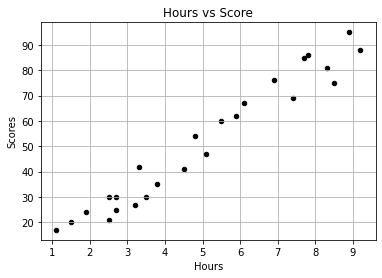

In [5]:
#Step 2: Visualising the dataset
data.plot.scatter(x= "Hours",
                  y="Scores", 
                  title="Hours vs Score", 
                  xlabel='No. of hours studied',
                  ylabel='Score or percentage',
                  color='black');
plt.grid();
plt.show();




From the graph, we observe that there is a linear relation between the two variables- score and no. of hours spent by a student studying. We can apply linear regression to predict the value.

Step 3

In [6]:
#Step 3: Data Preparation- Data is going to be divided into two parts attributes(inputs) and labels(output).
x = data.iloc[:,:-1].values
y = data.iloc[:,1]


In [7]:
#splitting the data into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**Step 4**

In [8]:
#Step 4: Training the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step 5**

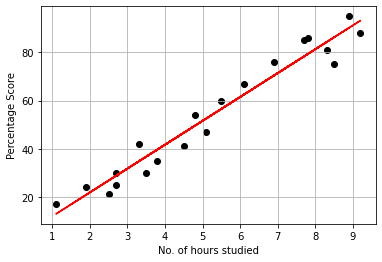

In [9]:
#Step 5: Visualising the trained model.

line = model.coef_*x + model.intercept_

plt.scatter(X_train, Y_train, color='black')
plt.plot(x, line, color='red');
plt.xlabel('No. of hours studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

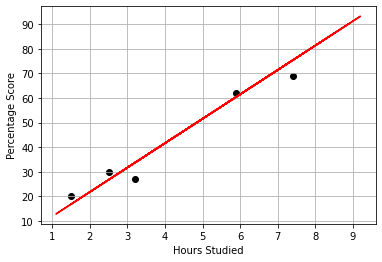

In [10]:
#Plotting for the test data
plt.scatter(X_test, Y_test, color='black')
plt.plot(x, line, color='red');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()


**Step 6**

In [11]:
#Step 6: Predicting

Y_predicted = model.predict(X_test)

In [12]:
# Comparing actual values vs the predicted values

compare = pd.DataFrame({'Actual Score': Y_test, 'Predicted Score': Y_predicted})  
compare

,Actual Score,Predicted Score
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [13]:
# Testing with your own data -  According to the task given, we have to find out the predicted score for 9.25 hours of study

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is 93.69173248737539


**Step 7**

In [14]:
#Step 7: Finding the accuracy of the model using the mean error


from sklearn import metrics  

print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predicted))
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))

Mean Squared Error: 21.598769307217456
Mean Absolute Error: 4.183859899002982
